In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transfusion/transfusion.csv


In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
transfusion_filepath="../input/blood-donation/blood donation.csv"

In [13]:
transfusion_data=pd.read_csv(transfusion_filepath)

In [14]:
transfusion_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0,13,3250,28,1
1,0,2,500,4,0
2,0,26,6500,76,1
3,0,3,750,4,0
4,0,8,2000,59,0


In [15]:
transfusion_data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [16]:
transfusion_data.rename(
    columns={'whether he/she donated blood in March 2007': 'Target'},
    inplace=True)

transfusion_data.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,0,13,3250,28,1
1,0,2,500,4,0


In [17]:
transfusion_data.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Target                   0
dtype: int64

In [18]:
transfusion_data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'Target'],
      dtype='object')

<Figure size 1080x720 with 0 Axes>

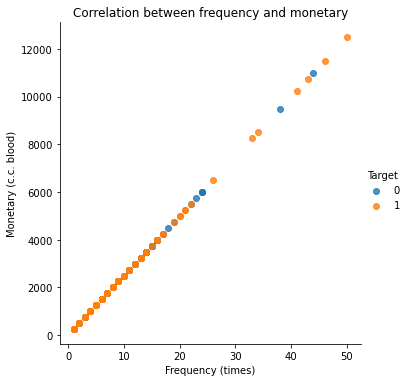

In [23]:
#correlation between frequency and monetary
plt.figure(figsize=(15,10));
g1 = sns.lmplot(x='Frequency (times)',
               y='Monetary (c.c. blood)',
               hue='Target',
               fit_reg=False,
               data=transfusion_data);
g1 = plt.title("Correlation between frequency and monetary");
plt.show();

In [26]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    transfusion_data.drop(columns='Target'),
    transfusion_data.Target,
    test_size=0.25,
    random_state=42, stratify= transfusion_data.Target
)

# Print out the first 2 rows of X_train
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
260,2,1,250,2
313,2,15,3750,49
339,2,2,500,4
627,4,3,750,34
102,12,11,2750,39


NameError: name 'X_train' is not defined